In [2]:
# Here we will be trying to find a way to calculate the line of best fit
# This will be our own programming implementation, but we will use help
# We will use help for the math aspect

# So we can use the Least Squares Regression to work out our weights

# This is our basic linear regression class

# This is where we import all the neccesary modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class LinearRegressor:
    # We initalize in a sense our variables over here
    sumx = 0
    sumy = 0
    sumxsq = 0
    sumxy = 0
    slope = 0
    b = 0
    counter = 0
    arr = []
    arr2 = []
    
    # The fitter class is to fit the data, this is how we get the values to generate our equation
    def fitter(self, x, y):
        for k, i in zip(x, y):
            for m, n in zip(k, i):
                self.sumx += m
                self.sumy += n
                self.sumxsq += m**2
                self.sumxy += m*n
                self.counter+=1
    
    # After we have gotten the neccesary values from fitter, we can generate our equation
    # Note that we use the Sum of Least Squares Method
    def equate(self):
        self.slope = (self.sumxy - (self.sumx*self.sumy))/(self.sumxsq - (self.sumx**2))
        self.b = (self.sumy - (self.slope*self.sumx))/(self.counter)
    
    # Finally once we have our equation we can do the prediction
    # In this case we go through each value, put it throuhg the equation and format it into a 2D array
    def predict(self, p):
        arr = []
        arr2 = []
        for l in p:
            for m in l:
                arrwow = []
                g = m*self.slope + self.b
                arrwow.append(g)
                arr2.append(arrwow)
        np.array(arr2)
        return(arr2)
    
    # This is where we can format data
    # It was mentioned how data can sometimes be formatted incorrectly
    # This class aims to format data properly for use with the other methods
    def formatter(self, k):
        k = np.array(k)
        arr = []
        arr2 = []
        # We use an if statement to check for the types of arrays and run the appropriate code
        # We use np.ndim to check for dimensions
        # This will work for 1D and 2D arrays
        
        if(np.ndim(k) == 1):
            for l in k:
                arrwow = []
                g = l
                arrwow.append(g)
                arr2.append(arrwow)
            np.array(arr2)
            return(arr2)
        elif(np.ndim(k) == 2):
            for l in k:
                for m in l:
                    arrwow = []
                    g = m
                    arrwow.append(g)
                    arr2.append(arrwow)
            np.array(arr2)
            return(arr2)
        else:
            return("Invalid Array Type: Try Again with a 1D or 2D array")
    
    # It is helpful to see how the coefficents(or weights) so this method uses the variables from equate and displays them
    def coefficents(self):
        return("W1:" + str(self.slope))
        return("W0:" + str(self.b))
    
    # Often times it can also be helpful to test the equation for specific value so the tester method allows users to input a custom value
    def tester(self, j):
        return(self.slope*j + self.b)

In [3]:
# This is where we will import our data and organize it into the x and y (or the feature matrix and dependent variables matrix)

dataset_path = 'Salary_Data.csv'
dataset = pd.read_csv(dataset_path)

# This is how we index the data to split it
# Note one thing, sometimes when we index the data it can be formatted wierdly
# i.e the data sometimes isn't in a 2d matrix or isn't right

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [4]:
# This is where we split the data into 2 parts(train and test)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 0)

In [5]:
# Finally we can use our class to do our linear regression

# First we initalize our class here
lr = LinearRegressor()

# Then we fix the dimensions for our x and y
y_train = lr.formatter(y_train)
x_train = lr.formatter(x_train)

# Then we fit the data 
lr.fitter(x_train, y_train)

# We then run the equation on the data we have (Least Squares Method)
lr.equate()

# Finally we have our prediction
y_pred = lr.predict(x_train)

# We can take a look at the equation as well
lr.coefficents()

# We can also test values in our equation
lr.tester(10)

# Couple things to note:
# It is best to format everything first, then fit, equate, and predict. Then we can look at things like the coefficents and test values
# Althout it can be noted that you can do tester after equate to test things

146368.2836254347

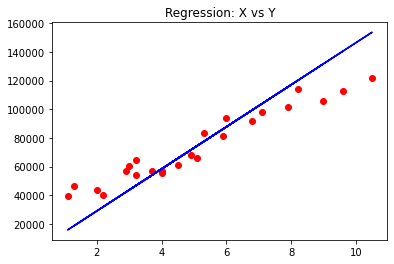

In [6]:
# We can do some data visualization here
# This is for the training data

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.title("Regression: X vs Y")
plt.xlabel = ('X - Values')
plt.ylabel = ('Y - Values')
plt.show()

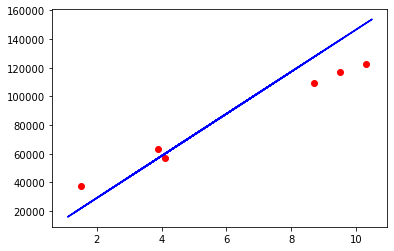

In [7]:
# We visualize the testing data here
# Note how we use x_train and lr.predict(x_train)
# This is because even if we use x_test, we would get the same line

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'blue')
plt.xlabel = ('X - Values')
plt.ylabel = ('Y - Values')
plt.show()